# **Tour and Travel Customer Churn Prediction**

The goal of this analysis is to build predictive models that can save company resources. 

## **Data Loading**

In [5]:
# Importing libraries
import pandas as pd

# Load the dataset
file_path = 'Customertravel.csv'  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


## **Data Overview**
We will explore  the data to understand its characteristics and identify any potential issues.

In [6]:
# 1. Data Overview
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)

# 2. Descriptive Statistics
print(data.describe(include='all'))



Dataset Shape: (954, 7)
Columns: Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')
               Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
count   954.000000           954               954     954.000000   
unique         NaN             3                 3            NaN   
top            NaN            No     Middle Income            NaN   
freq           NaN           608               409            NaN   
mean     32.109015           NaN               NaN       2.437107   
std       3.337388           NaN               NaN       1.606233   
min      27.000000           NaN               NaN       1.000000   
25%      30.000000           NaN               NaN       1.000000   
50%      31.000000           NaN               NaN       2.000000   
75%      35.000000           NaN               NaN       4.000000   
max      38.000000           NaN               Na

## **3. Data Cleaning**

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values using forward fill
data.ffill(inplace=True)  # Forward fill for simplicity


Missing Values:
 Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64


## **Exploratory Data Analysis (EDA)**
### Target Variable Distribution
Visualize the distribution of the target variable (churn).



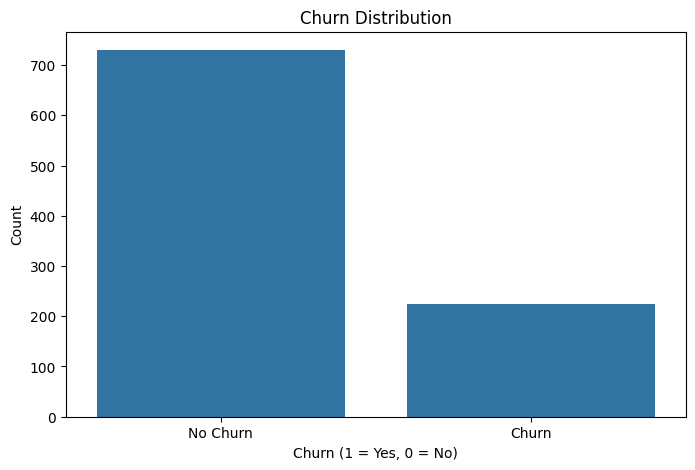

In [8]:
# Target Variable Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


### Age Distribution
Visualize the age distribution of customers.


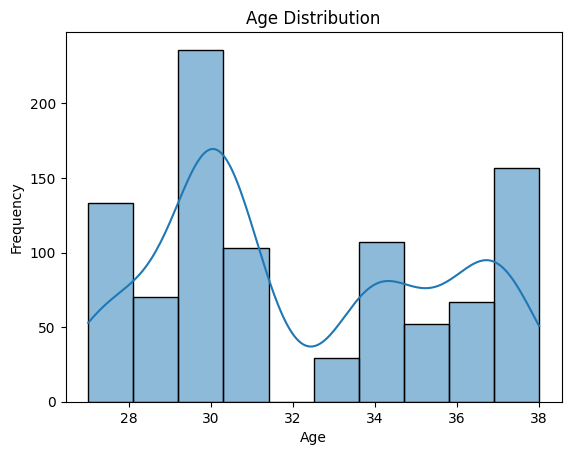

In [9]:
# Age Distribution
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Churn by Frequent Flyer Status


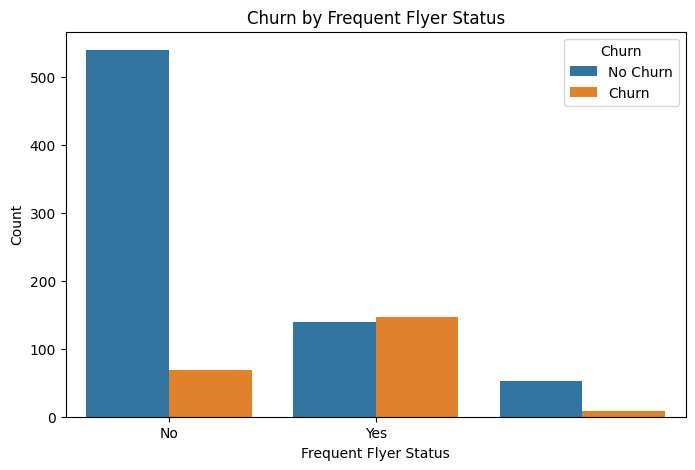

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='FrequentFlyer', hue='Target', data=data)
plt.title('Churn by Frequent Flyer Status')
plt.xlabel('Frequent Flyer Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


### Churn by Annual Income Class


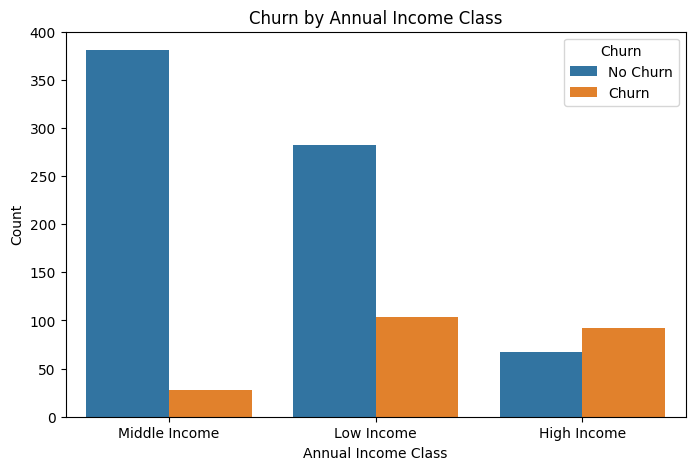

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='AnnualIncomeClass', hue='Target', data=data)
plt.title('Churn by Annual Income Class')
plt.xlabel('Annual Income Class')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


### Churn by Services Opted


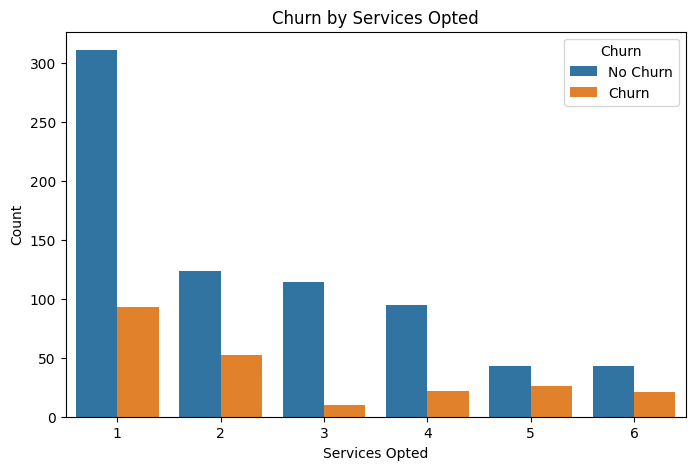

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ServicesOpted', hue='Target', data=data)
plt.title('Churn by Services Opted')
plt.xlabel('Services Opted')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


## **Data Preprocessing**
### Encoding Categorical Variables
Convert categorical variables to numerical format.


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
label_encoder = LabelEncoder()

# Encode categorical variables
data['FrequentFlyer'] = label_encoder.fit_transform(data['FrequentFlyer'])
data['AnnualIncomeClass'] = label_encoder.fit_transform(data['AnnualIncomeClass'])
data['ServicesOpted'] = label_encoder.fit_transform(data['ServicesOpted'])
data['AccountSyncedToSocialMedia'] = label_encoder.fit_transform(data['AccountSyncedToSocialMedia'])
data['BookedHotelOrNot'] = label_encoder.fit_transform(data['BookedHotelOrNot'])


### Feature and Target Variable Separation
We will split the dataset into features (X) and the target variable (y).


In [14]:
# Splitting features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

## Train-Test Split
In this section, we will split the dataset into training and testing sets.


In [15]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Building**
Predictive model using the Random Forest classifier.


In [16]:
# Model Building (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Predictions**
In this section, we will use the model to make predictions on the test set.


In [17]:
# Predictions
y_pred = model.predict(X_test)

## **Model Evaluation**
We will evaluate the performance of the model using accuracy, classification report, and confusion matrix.


In [18]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8743455497382199
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       153
           1       0.72      0.61      0.66        38

    accuracy                           0.87       191
   macro avg       0.81      0.77      0.79       191
weighted avg       0.87      0.87      0.87       191

Confusion Matrix:
 [[144   9]
 [ 15  23]]


### Conclusion

1. **Model Accuracy**: The model achieved an accuracy of **87.43%**, indicating good overall performance.

2. **Class 0 (Non-Churned Customers)**:
   - **Precision**: **91%** 
   - **Recall**: **94%**
   - Strong performance in identifying non-churned customers.

3. **Class 1 (Churned Customers)**:
   - **Precision**: **72%**
   - **Recall**: **61%**
   - Lower performance; the model misses a significant number of churned customers.

4. **Confusion Matrix**:
   - **True Negatives (TN)**: 144 (144 customers correctly predicted as not churning.)
   - **False Positives (FP)**: 9 (9 customers incorrectly predicted as churning.)

   - **False Negatives (FN)**: 15 (15 customers incorrectly predicted as not churning.)

   - **True Positives (TP)**: 23 (23 customers correctly predicted as churning.)


### Recommendations
- Improve feature engineering to better capture churn indicators.
- Explore different algorithms and perform hyperparameter tuning.
- Analyze churned customer characteristics for targeted retention strategies.

